# 线性模型

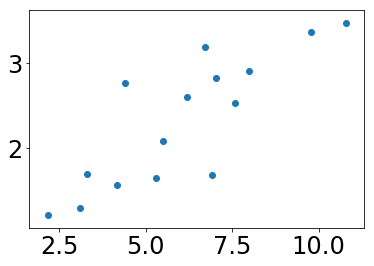

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

x = np.linspace(0, 5, 100)
 
# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了……

x_train=np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train=np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
# figure()指定图表名称
plt.figure('data')
 
# '.'标明画散点图，每个散点的形状是个圆
plt.plot(x_train, y_train, '.')
 
# scatter可以更容易地生成散点图
plt.scatter(x_train, y_train)
plt.savefig('result.png') 
# 一定要加上这句才能让画好的图显示在屏幕上
plt.show()

In [5]:
new_x=torch.from_numpy(x_train)
new_y=torch.from_numpy(y_train)

In [6]:
#define a model

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear=nn.Linear(1,1) #1 dimension
    def forward(self,x):
        out=self.linear(x)
        return out
#if torch.cuda.is_available():
#    model=LinearRegression().cuda()
#else:
model=LinearRegression()


In [7]:
criterion=nn.MSELoss()#误差
optimizer=optim.SGD(model.parameters(),lr=1e-3)#lr是学习率

In [10]:
#train
num_epochs=1000
for epoch in range(num_epochs):
#    if torch.cuda.is_available():
#        inputs=Variable(new_x).cuda()
#        target=Variable(new_y).cuda()
#    else:
    inputs=Variable(new_x)
    target=Variable(new_y)
    outs=model(inputs)
    loss=criterion(outs,target)#误差最小
    optimizer.zero_grad()#梯度归0
    loss.backward()#反响传播
    optimizer.step()#通过梯度做进一步参数更新
    if (epoch+1)%20==0:
        print('times[{}/{}],loss:{}'.format(epoch+1,num_epochs,loss.data))

times[20/1000],loss:
 0.1739
[torch.FloatTensor of size 1]

times[40/1000],loss:
 0.1739
[torch.FloatTensor of size 1]

times[60/1000],loss:
 0.1738
[torch.FloatTensor of size 1]

times[80/1000],loss:
 0.1738
[torch.FloatTensor of size 1]

times[100/1000],loss:
 0.1737
[torch.FloatTensor of size 1]

times[120/1000],loss:
 0.1737
[torch.FloatTensor of size 1]

times[140/1000],loss:
 0.1736
[torch.FloatTensor of size 1]

times[160/1000],loss:
 0.1736
[torch.FloatTensor of size 1]

times[180/1000],loss:
 0.1735
[torch.FloatTensor of size 1]

times[200/1000],loss:
 0.1735
[torch.FloatTensor of size 1]

times[220/1000],loss:
 0.1734
[torch.FloatTensor of size 1]

times[240/1000],loss:
 0.1734
[torch.FloatTensor of size 1]

times[260/1000],loss:
 0.1733
[torch.FloatTensor of size 1]

times[280/1000],loss:
 0.1733
[torch.FloatTensor of size 1]

times[300/1000],loss:
 0.1733
[torch.FloatTensor of size 1]

times[320/1000],loss:
 0.1732
[torch.FloatTensor of size 1]

times[340/1000],loss:
 0.173

用cuda出现错误`Cuda runtime error (8) : invalid device function`凉凉 看来是GPU太老了 [link](https://discuss.pytorch.org/t/cuda-runtime-error-8-invalid-device-function/3584/5)，由结果可以看出，loss逐渐在减小.optimizer.zero_grad()是在归零梯度，否则梯度累加，不会收敛

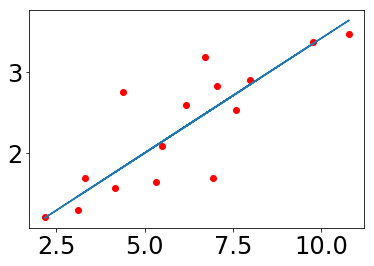

In [11]:
#predict
model.eval()#转换成测试模式
model.cpu()
predict=model(Variable(new_x))
predict=predict.data.numpy()
plt.plot(new_x.numpy(),new_y.numpy(),'ro',label='Original Data')
plt.plot(new_x.numpy(),predict,label='fitting line')
plt.show()

## 多项式回归

In [16]:
def make_features(x):
    x=x.unsqueeze(1)
    return torch.cat([x**i for i in range(1,4)],1)
W_target=torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)#原来是size为3,现在是3×1
b_target=torch.FloatTensor([0.9])

In [30]:
def f(x):
    return x.mm(W_target)+b_target[0]#目标函数

#构建训练集
def get_batch(batch_size=32):
    random=torch.randn(batch_size)
    x=make_features(random)
    y=f(x)
    return Variable(x),Variable(y)

In [19]:
#定义模型
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model,self).__init__()
        self.poly=nn.Linear(3,1)
    def forward(self,x):
        out=self.poly(x)
        return out
model=poly_model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=1e-3)

In [25]:
epoch=0
while True:
    batch_x,batch_y=get_batch()
    output=model(batch_x)
    loss=criterion(output,batch_y)
    print_loss=loss.data[0]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch+=1
    if print_loss<1e-3:
        break

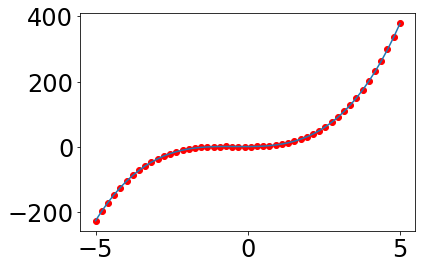

In [34]:
model.eval()
model.cpu()
x_test = np.linspace(-5,5,50).astype(np.float32)
y_test = 0.9+0.5*x_test+np.square(x_test)*3+np.power(x_test,3)*2.4
predict=model(Variable(make_features(torch.from_numpy(x_test))))
predict=predict.data.numpy()
plt.plot(x_test,y_test,'ro',label='Original Data')
plt.plot(x_test,predict,label='fitting line')
plt.show()

### Summary
拟合效果非常好，但是由于我的cuda可能版本有问题，暂时无法用.cuda(),不过先学着，等用到数据大的再重新装好了。